<a href="https://colab.research.google.com/github/ddesai-sjsu/Machine-Learning/blob/main/ML_MidTerm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Midterm Test**:
### **1) Business case:**
 * To find the golden cluster of properties that are a good investements(If profit(rent-mortgage-HOA) is greater than 0). To maximize the profit, we need to find properties with higher rate, and lesser mortgage & HOA.
 * I also used Crime rate dataset to find properties that are in areas that have lesser crime rate. As, properties with higher crime rates, will have lesser rents, which will not support our purpose to find profitable & safe properties.



In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

* **Collecting dataset from Google drive to Pandas Dataframe** 

In [2]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id='1IcWELX-0iAYBBBnIuVJo5V3LU8wKR86V'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('dataset.csv')


id='1vrNDJ6cZMQaBJmDlaY-KbBZvhP38IZUh'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('california.xls')

id='1K20_G8_iECV5ZJUaaA1T7MIuEwb04WIk'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('df_filtered.csv')

In [ ]:
df=pd.read_csv('/content/dataset.csv')

In [ ]:
df = df[(df['address'].str.contains('Carlsbad')) | (df['address'].str.contains('Escondido')) | (df['address'].str.contains('Encinitas')) | (df['address'].str.contains('Del Mar'))]

* **Filtering dataset for the cities assigned**

### **2. Data Prep:**
Implement 3 amalgamations:

First data set: Dataset given

Second data enrichment: Downloaded the Crime data set from the following url:
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

Third data enrichment -- scrape data from a source and amalgamate:

**Getting HOA:**

In order to find profit on a property(if invested), we need to find HOA and Monthly mortgage.

I have used beautifulSoup to scrape HOA from zillow by using property url in the

In [ ]:
from bs4 import BeautifulSoup
import requests
import re
def get_hoa(url):
    try:
      req_headers = {
          'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
          'accept-encoding': 'gzip, deflate, br',
          'accept-language': 'en-US,en;q=0.8',
          'upgrade-insecure-requests': '1',
          'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'
      }

      with requests.Session() as s:
          # url = 'https://www.zillow.com/homedetails/No-Address-Old-Lantern-Ln-136-Escondido-CA-92026/2069245820_zpid/'
          r = s.get(url, headers=req_headers)
          soup=BeautifulSoup(r.content)
          all_vals=soup.find_all('span', {'class':'Text-c11n-8-48-0__sc-aiai24-0 dQezUG'})
          # print(all_vals)

      for i in all_vals:
        
        if 'HOA' in i.text and 'None' not in i.text:
          # print(i.text)
          price=re.findall(r'\d+',i.text)
          return (i.text,price[0])
      return ('None',0)
    except:
      return ('None',0)


In [ ]:
df['hoa']=df['property_url'].apply(lambda x: get_hoa(x)[1])

In [ ]:
df.to_csv('df_filtered.csv')

In [6]:
df=pd.read_csv('df_filtered.csv')

In [9]:
def get_city(city):
  if 'Escondido' in city:
    return 'Escondido'
  elif 'Carlsbad' in city:
    return 'Carlsbad'
  elif 'Del Mar' in city:
    return 'Del Mar'
  else:
    return 'Encinitas'

In [10]:
df

,Unnamed: 0,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url,hoa
0,8,24,16713230,"545 Ocean View Ave, Encinitas, CA 92024",33.058939,-117.291904,2799900.0,USD,4.0,4.0,3164.0 sqft,NaN,2951100.0,8486.0,9.0,NaN,False,https://photos.zillowstatic.com/fp/5df598bdc16...,House for sale,"eXp Realty of California, Inc.","https://www.zillow.com/homes/Encinitas,-CA_rb/",https://www.zillow.com/homedetails/545-Ocean-V...,"https://www.zillow.com/homes/Encinitas,-CA_rb/",0
1,12,105,16649104,"1735 Kirk Pl, Carlsbad, CA 92008",33.154925,-117.323344,1695000.0,USD,2.0,4.0,2132.0 sqft,NaN,1714700.0,3200.0,63.0,NaN,False,https://photos.zillowstatic.com/fp/08c1e6f153b...,House for sale,Pacific Investment Properties,"https://www.zillow.com/homes/carlsbad,-CA_rb/",https://www.zillow.com/homedetails/1735-Kirk-P...,"https://www.zillow.com/homes/carlsbad,-CA_rb/3_p/",0
2,24,12,2069780911,"328-330 9th St, Del Mar, CA 92014",32.952728,-117.265247,3200000.0,USD,3.0,5.0,2730.0 sqft,NaN,NaN,10645.0,36.0,NaN,False,https://photos.zillowstatic.com/fp/db38d26f9f8...,Multi-family home for sale,NaN,"https://www.zillow.com/homes/Del-Mar,-CA_rb/",https://www.zillow.com/homedetails/328-330-9th...,"https://www.zillow.com/homes/Del-Mar,-CA_rb/",0
3,34,152,120790271,"21670 Saddle Bred Ln, Escondido, CA 92029",33.106495,-117.131045,724900.0,USD,3.0,3.0,1686.0 sqft,NaN,739600.0,3200.0,50.0,NaN,False,https://photos.zillowstatic.com/fp/7b6343eb005...,House for sale,NaN,"https://www.zillow.com/homes/Escondido,-CA_rb/",https://www.zillow.com/homedetails/21670-Saddl...,"https://www.zillow.com/homes/Escondido,-CA_rb/...",240
4,45,15,16620726,"2629 Valewood Ave, Carlsbad, CA 92010",33.163764,-117.312317,1250000.0,USD,3.0,3.0,1855.0 sqft,NaN,1045000.0,3896.0,1.0,NaN,False,https://photos.zillowstatic.com/fp/76432f4b4f6...,Coming soon,NaN,"https://www.zillow.com/homes/carlsbad,-CA_rb/",https://www.zillow.com/homedetails/2629-Valewo...,"https://www.zillow.com/homes/carlsbad,-CA_rb/",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,5845,38,67094309,"1028 Dewitt Ave, Encinitas, CA 92024",33.039015,-117.291016,1599900.0,USD,2.0,3.0,1380.0 sqft,NaN,1646000.0,5602.0,23.0,NaN,False,https://photos.zillowstatic.com/fp/bc5104c55fa...,Multi-family home for sale,NaN,"https://www.zillow.com/homes/Encinitas,-CA_rb/",https://www.zillow.com/homedetails/1028-Dewitt...,"https://www.zillow.com/homes/Encinitas,-CA_rb/",150
460,5847,7,16702656,"535 Howe Pl, Escondido, CA 92025",33.095877,-117.074769,789000.0,USD,2.0,4.0,1727.0 sqft,NaN,793900.0,3200.0,1.0,NaN,False,https://photos.zillowstatic.com/fp/76187ab6fd8...,House for sale,Keller Williams Realty,"https://www.zillow.com/homes/Escondido,-CA_rb/",https://www.zillow.com/homedetails/535-Howe-Pl...,"https://www.zillow.com/homes/Escondido,-CA_rb/",0
461,5857,96,16705104,"2257 Eucalyptus Ave, Escondido, CA 92029",33.086987,-117.103090,1575000.0,USD,3.0,4.0,2542.0 sqft,NaN,1585300.0,4500.0,15.0,NaN,False,https://photos.zillowstatic.com/fp/818f719d81c...,House for sale,Berkshire Hathaway HomeService,"https://www.zillow.com/homes/Escondido,-CA_rb/",https://www.zillow.com/homedetails/2257-Eucaly...,"https://www.zillow.com/homes/Escondido,-CA_rb/...",0
462,5873,192,2069976590,"0 Via Sinsonte, Escondido, CA 92027",33.117963,-117.025938,499000.0,USD,NaN,NaN,NaN,10.53 acres,NaN,1895.0,106.0,NaN,False,https://photos.zillowstatic.com/fp/8869e3edb05...,Lot / Land for sale,Coldwell Banker Realty,"https://www.zillow.com/homes/Escondido,-CA_rb/",https://www.zillow.com/homedetails/0-Via-Sinso...,"https://www.zillow.com/homes/Escondido,-CA_rb/...",0


**Data cleaning:**

In [11]:
df['City']=df['address'].apply(lambda x: get_city(x))

In [12]:
df['area']=df['area'].str.replace(r'sqft', '').fillna(0.0).astype(float).astype(int)

In [13]:
df.head()

,Unnamed: 0,rank,property_id,address,latitude,longitude,price,currency,bathrooms,bedrooms,area,land_area,zestimate,rent_zestimate,days_on_zillow,sold_date,is_zillow_owned,image,listing_type,broker_name,input,property_url,listing_url,hoa,City
0,8,24,16713230,"545 Ocean View Ave, Encinitas, CA 92024",33.058939,-117.291904,2799900.0,USD,4.0,4.0,3164,NaN,2951100.0,8486.0,9.0,NaN,False,https://photos.zillowstatic.com/fp/5df598bdc16...,House for sale,"eXp Realty of California, Inc.","https://www.zillow.com/homes/Encinitas,-CA_rb/",https://www.zillow.com/homedetails/545-Ocean-V...,"https://www.zillow.com/homes/Encinitas,-CA_rb/",0,Encinitas
1,12,105,16649104,"1735 Kirk Pl, Carlsbad, CA 92008",33.154925,-117.323344,1695000.0,USD,2.0,4.0,2132,NaN,1714700.0,3200.0,63.0,NaN,False,https://photos.zillowstatic.com/fp/08c1e6f153b...,House for sale,Pacific Investment Properties,"https://www.zillow.com/homes/carlsbad,-CA_rb/",https://www.zillow.com/homedetails/1735-Kirk-P...,"https://www.zillow.com/homes/carlsbad,-CA_rb/3_p/",0,Carlsbad
2,24,12,2069780911,"328-330 9th St, Del Mar, CA 92014",32.952728,-117.265247,3200000.0,USD,3.0,5.0,2730,NaN,NaN,10645.0,36.0,NaN,False,https://photos.zillowstatic.com/fp/db38d26f9f8...,Multi-family home for sale,NaN,"https://www.zillow.com/homes/Del-Mar,-CA_rb/",https://www.zillow.com/homedetails/328-330-9th...,"https://www.zillow.com/homes/Del-Mar,-CA_rb/",0,Del Mar
3,34,152,120790271,"21670 Saddle Bred Ln, Escondido, CA 92029",33.106495,-117.131045,724900.0,USD,3.0,3.0,1686,NaN,739600.0,3200.0,50.0,NaN,False,https://photos.zillowstatic.com/fp/7b6343eb005...,House for sale,NaN,"https://www.zillow.com/homes/Escondido,-CA_rb/",https://www.zillow.com/homedetails/21670-Saddl...,"https://www.zillow.com/homes/Escondido,-CA_rb/...",240,Escondido
4,45,15,16620726,"2629 Valewood Ave, Carlsbad, CA 92010",33.163764,-117.312317,1250000.0,USD,3.0,3.0,1855,NaN,1045000.0,3896.0,1.0,NaN,False,https://photos.zillowstatic.com/fp/76432f4b4f6...,Coming soon,NaN,"https://www.zillow.com/homes/carlsbad,-CA_rb/",https://www.zillow.com/homedetails/2629-Valewo...,"https://www.zillow.com/homes/carlsbad,-CA_rb/",0,Carlsbad


In [14]:
df.isnull().sum(axis = 0)

Unnamed: 0           0
rank                 0
property_id          0
address              0
latitude             6
longitude            6
price                0
currency             0
bathrooms           87
bedrooms            84
area                 0
land_area          380
zestimate          134
rent_zestimate      42
days_on_zillow       0
sold_date          464
is_zillow_owned      0
image                0
listing_type         0
broker_name        192
input                0
property_url         0
listing_url          0
hoa                  0
City                 0
dtype: int64

In [15]:
def get_land_area_sqft(i):
  try:
    land_area_str=str(i)
    if 'acres' in land_area_str:
        return int(float(land_area_str.replace(r'acres', '')))*43560
    else:
        return int(float(land_area_str.replace(r'sqft', '')))
  except:
      return 0


In [16]:
df['get_land_area_sqft']=df['land_area'].apply(lambda x: get_land_area_sqft(x))

In [17]:
df.isnull().sum(axis = 0)

Unnamed: 0              0
rank                    0
property_id             0
address                 0
latitude                6
longitude               6
price                   0
currency                0
bathrooms              87
bedrooms               84
area                    0
land_area             380
zestimate             134
rent_zestimate         42
days_on_zillow          0
sold_date             464
is_zillow_owned         0
image                   0
listing_type            0
broker_name           192
input                   0
property_url            0
listing_url             0
hoa                     0
City                    0
get_land_area_sqft      0
dtype: int64

In [18]:
df['bathrooms'].fillna((df['bathrooms'].mean()), inplace=True)

In [19]:
df['bedrooms'].fillna((df['bedrooms'].mean()), inplace=True)

In [20]:
df['zestimate'].fillna((df['zestimate'].mean()), inplace=True)

In [21]:
df['rent_zestimate'].fillna((df['rent_zestimate'].mean()), inplace=True)

In [22]:
type(df['land_area'])

pandas.core.series.Series

In [23]:
df.isnull().sum(axis = 0)

Unnamed: 0              0
rank                    0
property_id             0
address                 0
latitude                6
longitude               6
price                   0
currency                0
bathrooms               0
bedrooms                0
area                    0
land_area             380
zestimate               0
rent_zestimate          0
days_on_zillow          0
sold_date             464
is_zillow_owned         0
image                   0
listing_type            0
broker_name           192
input                   0
property_url            0
listing_url             0
hoa                     0
City                    0
get_land_area_sqft      0
dtype: int64

In [24]:
df.columns

Index(['Unnamed: 0', 'rank', 'property_id', 'address', 'latitude', 'longitude',
       'price', 'currency', 'bathrooms', 'bedrooms', 'area', 'land_area',
       'zestimate', 'rent_zestimate', 'days_on_zillow', 'sold_date',
       'is_zillow_owned', 'image', 'listing_type', 'broker_name', 'input',
       'property_url', 'listing_url', 'hoa', 'City', 'get_land_area_sqft'],
      dtype='object')

In [25]:
df=df[['City','rank', 'latitude', 'longitude',
       'price', 'bathrooms', 'bedrooms', 'area',
       'zestimate', 'rent_zestimate', 'days_on_zillow',
       'is_zillow_owned', 'hoa', 'get_land_area_sqft']]

In [26]:
def get_monthly_mortage(price):
  return price//180

**As a part of data preparation and feature transformation, I converted area from acres to square feet & also, computed mortgage per month.**


In [27]:
df['mortage_per_month']=df['price'].apply(lambda x: get_monthly_mortage(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df

,City,rank,latitude,longitude,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,hoa,get_land_area_sqft,mortage_per_month
0,Encinitas,24,33.058939,-117.291904,2799900.0,4.000000,4.000000,3164,2.951100e+06,8486.0,9.0,False,0,0,15555.0
1,Carlsbad,105,33.154925,-117.323344,1695000.0,2.000000,4.000000,2132,1.714700e+06,3200.0,63.0,False,0,0,9416.0
2,Del Mar,12,32.952728,-117.265247,3200000.0,3.000000,5.000000,2730,1.946873e+06,10645.0,36.0,False,0,0,17777.0
3,Escondido,152,33.106495,-117.131045,724900.0,3.000000,3.000000,1686,7.396000e+05,3200.0,50.0,False,240,0,4027.0
4,Carlsbad,15,33.163764,-117.312317,1250000.0,3.000000,3.000000,1855,1.045000e+06,3896.0,1.0,False,0,0,6944.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Encinitas,38,33.039015,-117.291016,1599900.0,2.000000,3.000000,1380,1.646000e+06,5602.0,23.0,False,150,0,8888.0
460,Escondido,7,33.095877,-117.074769,789000.0,2.000000,4.000000,1727,7.939000e+05,3200.0,1.0,False,0,0,4383.0
461,Escondido,96,33.086987,-117.103090,1575000.0,3.000000,4.000000,2542,1.585300e+06,4500.0,15.0,False,0,0,8750.0
462,Escondido,192,33.117963,-117.025938,499000.0,2.994695,3.310526,0,1.946873e+06,1895.0,106.0,False,0,435600,2772.0


**Adding another feature 'Useful', which depicts if a property is profitable.**


**1--> Property is profitable**
**0--> Non-profitable property**

In [29]:
df['Useful']=df['rent_zestimate']-df['mortage_per_month']-df['hoa']>0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [30]:
df2=pd.read_excel('california.xls',header=4)

In [31]:
df2.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter', 'Rape1', 'Robbery',
       'Aggravated\nassault', 'Property\ncrime', 'Burglary', 'Larceny-\ntheft',
       'Motor\nvehicle\ntheft', 'Arson'],
      dtype='object')

### **Data Amalgamation:**

Donwloaded Crime dataset, and performed amalgamation of features like population of cityand total number of crime reports in the city.

In [32]:
col_names=['City', 'Population', 'Violent',
       'Murder', 'Rape', 'Robbery',
       'AggravatedAssault', 'PropertyCrime', 'Burglary', 'LarcenTheft',
       'MotorVehicleTheft', 'Arson']

In [33]:
df2.columns=col_names

In [34]:
df2['Total_Crime']=df2['Violent']+df2['Murder']+df2['Population']+df2['Rape']+df2['Robbery']+df2['AggravatedAssault']+df2['PropertyCrime']+df2['Burglary']+df2['LarcenTheft']+df2['MotorVehicleTheft']+df2['Arson']
   

In [35]:
df2=df2[['City','Population','Total_Crime']]

In [36]:
df=pd.merge(df, df2, on=["City"])


In [37]:
df.isnull().sum(axis = 0)

City                  0
rank                  0
latitude              6
longitude             6
price                 0
bathrooms             0
bedrooms              0
area                  0
zestimate             0
rent_zestimate        0
days_on_zillow        0
is_zillow_owned       0
hoa                   0
get_land_area_sqft    0
mortage_per_month     0
Useful                0
Population            0
Total_Crime           0
dtype: int64

In [38]:
df['is_zillow_owned']=df['is_zillow_owned'].astype(int)

In [39]:
df['Useful']=df['Useful'].astype(int)

In [40]:
df.Useful.value_counts()

0    367
1     97
Name: Useful, dtype: int64

In [41]:
df

,City,rank,latitude,longitude,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,hoa,get_land_area_sqft,mortage_per_month,Useful,Population,Total_Crime
0,Encinitas,24,33.058939,-117.291904,2799900.0,4.000000,4.000000,3164,2.951100e+06,8486.0,9.0,0,0,0,15555.0,0,63320.0,64703.0
1,Encinitas,92,33.077616,-117.296788,270000.0,2.994695,3.310526,0,1.946873e+06,2694.0,1341.0,0,0,0,1500.0,1,63320.0,64703.0
2,Encinitas,36,33.055135,-117.300700,5895000.0,4.000000,4.000000,1784,5.769300e+06,9321.0,18.0,0,0,0,32750.0,0,63320.0,64703.0
3,Encinitas,35,33.055607,-117.299046,3875000.0,2.000000,2.000000,892,3.829780e+06,3499.0,17.0,0,0,0,21527.0,0,63320.0,64703.0
4,Encinitas,10,33.064152,-117.289877,1200000.0,2.000000,3.000000,1115,1.018600e+06,3940.0,2.0,0,0,0,6666.0,0,63320.0,64703.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Escondido,186,33.171562,-117.103903,155000.0,2.994695,3.310526,0,1.946873e+06,1694.0,85.0,0,0,43560,861.0,1,153215.0,159041.0
460,Escondido,7,33.095877,-117.074769,789000.0,2.000000,4.000000,1727,7.939000e+05,3200.0,1.0,0,0,0,4383.0,0,153215.0,159041.0
461,Escondido,96,33.086987,-117.103090,1575000.0,3.000000,4.000000,2542,1.585300e+06,4500.0,15.0,0,0,0,8750.0,0,153215.0,159041.0
462,Escondido,192,33.117963,-117.025938,499000.0,2.994695,3.310526,0,1.946873e+06,1895.0,106.0,0,0,435600,2772.0,0,153215.0,159041.0


## **3. Data Visualization**


**Latent Variables:**

1. **hoa**: Added by performing Web scraping using Beautiful Soup.

2. mortage_per_month: Computed from price 

3. Useful: Computed using above latent variables and cloumns from existing dataset. It depicts if property is profitable

4. Population & total_crime: Added using amalgamation of crime dataset



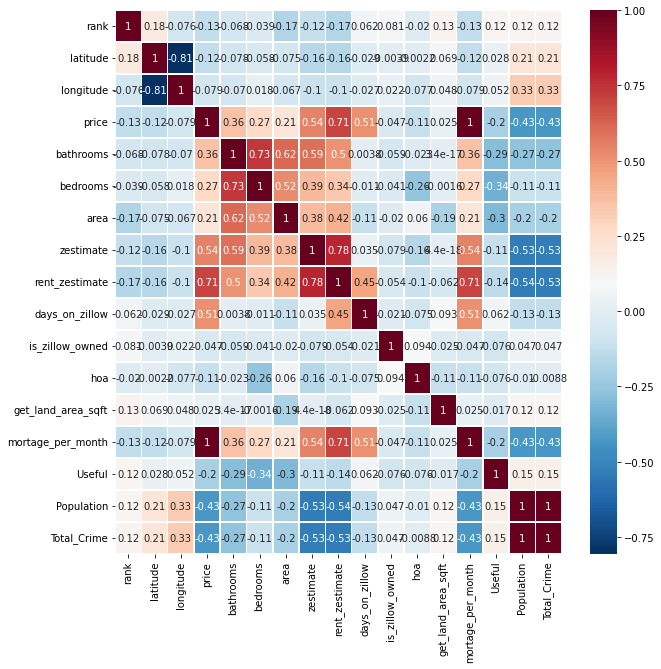

In [42]:
import seaborn as sb

pearsoncorr=df.corr()
plt.figure(1,figsize=(10,10))
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

In [43]:
df

,City,rank,latitude,longitude,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,hoa,get_land_area_sqft,mortage_per_month,Useful,Population,Total_Crime
0,Encinitas,24,33.058939,-117.291904,2799900.0,4.000000,4.000000,3164,2.951100e+06,8486.0,9.0,0,0,0,15555.0,0,63320.0,64703.0
1,Encinitas,92,33.077616,-117.296788,270000.0,2.994695,3.310526,0,1.946873e+06,2694.0,1341.0,0,0,0,1500.0,1,63320.0,64703.0
2,Encinitas,36,33.055135,-117.300700,5895000.0,4.000000,4.000000,1784,5.769300e+06,9321.0,18.0,0,0,0,32750.0,0,63320.0,64703.0
3,Encinitas,35,33.055607,-117.299046,3875000.0,2.000000,2.000000,892,3.829780e+06,3499.0,17.0,0,0,0,21527.0,0,63320.0,64703.0
4,Encinitas,10,33.064152,-117.289877,1200000.0,2.000000,3.000000,1115,1.018600e+06,3940.0,2.0,0,0,0,6666.0,0,63320.0,64703.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Escondido,186,33.171562,-117.103903,155000.0,2.994695,3.310526,0,1.946873e+06,1694.0,85.0,0,0,43560,861.0,1,153215.0,159041.0
460,Escondido,7,33.095877,-117.074769,789000.0,2.000000,4.000000,1727,7.939000e+05,3200.0,1.0,0,0,0,4383.0,0,153215.0,159041.0
461,Escondido,96,33.086987,-117.103090,1575000.0,3.000000,4.000000,2542,1.585300e+06,4500.0,15.0,0,0,0,8750.0,0,153215.0,159041.0
462,Escondido,192,33.117963,-117.025938,499000.0,2.994695,3.310526,0,1.946873e+06,1895.0,106.0,0,0,435600,2772.0,0,153215.0,159041.0


In [44]:
df.isna().sum(axis = 0)

City                  0
rank                  0
latitude              6
longitude             6
price                 0
bathrooms             0
bedrooms              0
area                  0
zestimate             0
rent_zestimate        0
days_on_zillow        0
is_zillow_owned       0
hoa                   0
get_land_area_sqft    0
mortage_per_month     0
Useful                0
Population            0
Total_Crime           0
dtype: int64

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 464 entries, 0 to 463
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   City                464 non-null    object 
 1   rank                464 non-null    int64  
 2   latitude            458 non-null    float64
 3   longitude           458 non-null    float64
 4   price               464 non-null    float64
 5   bathrooms           464 non-null    float64
 6   bedrooms            464 non-null    float64
 7   area                464 non-null    int64  
 8   zestimate           464 non-null    float64
 9   rent_zestimate      464 non-null    float64
 10  days_on_zillow      464 non-null    float64
 11  is_zillow_owned     464 non-null    int64  
 12  hoa                 464 non-null    int64  
 13  get_land_area_sqft  464 non-null    int64  
 14  mortage_per_month   464 non-null    float64
 15  Useful              464 non-null    int64  
 16  Populati

In [46]:
df=df.dropna()

In [47]:
df.dropna(axis='columns')

,City,rank,latitude,longitude,price,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,hoa,get_land_area_sqft,mortage_per_month,Useful,Population,Total_Crime
0,Encinitas,24,33.058939,-117.291904,2799900.0,4.000000,4.000000,3164,2.951100e+06,8486.0,9.0,0,0,0,15555.0,0,63320.0,64703.0
1,Encinitas,92,33.077616,-117.296788,270000.0,2.994695,3.310526,0,1.946873e+06,2694.0,1341.0,0,0,0,1500.0,1,63320.0,64703.0
2,Encinitas,36,33.055135,-117.300700,5895000.0,4.000000,4.000000,1784,5.769300e+06,9321.0,18.0,0,0,0,32750.0,0,63320.0,64703.0
3,Encinitas,35,33.055607,-117.299046,3875000.0,2.000000,2.000000,892,3.829780e+06,3499.0,17.0,0,0,0,21527.0,0,63320.0,64703.0
4,Encinitas,10,33.064152,-117.289877,1200000.0,2.000000,3.000000,1115,1.018600e+06,3940.0,2.0,0,0,0,6666.0,0,63320.0,64703.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,Escondido,186,33.171562,-117.103903,155000.0,2.994695,3.310526,0,1.946873e+06,1694.0,85.0,0,0,43560,861.0,1,153215.0,159041.0
460,Escondido,7,33.095877,-117.074769,789000.0,2.000000,4.000000,1727,7.939000e+05,3200.0,1.0,0,0,0,4383.0,0,153215.0,159041.0
461,Escondido,96,33.086987,-117.103090,1575000.0,3.000000,4.000000,2542,1.585300e+06,4500.0,15.0,0,0,0,8750.0,0,153215.0,159041.0
462,Escondido,192,33.117963,-117.025938,499000.0,2.994695,3.310526,0,1.946873e+06,1895.0,106.0,0,0,435600,2772.0,0,153215.0,159041.0


In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
X = df[[ "rent_zestimate","mortage_per_month"]]
X.head()

,rent_zestimate,mortage_per_month
0,8486.0,15555.0
1,2694.0,1500.0
2,9321.0,32750.0
3,3499.0,21527.0
4,3940.0,6666.0


## **4.Defining a Golden cluster using Fractal Clustering**

From data visualization above using heat map, i found two important features--rent_zestimate & mortage_per_month,  against which Fractal clustering can be done.



In [49]:
from sklearn.cluster import KMeans
df1=X
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df1)
    Sum_of_squared_distances.append(km.inertia_)

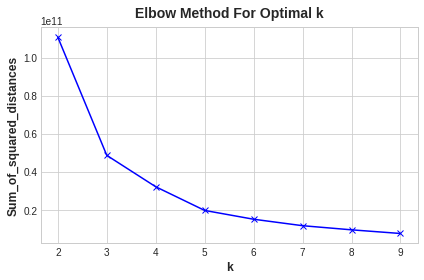

In [50]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [51]:
kmeans = KMeans(n_clusters=4)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,rent_zestimate,mortage_per_month,Cluster
0,8486.0,15555.0,1
1,2694.0,1500.0,1
2,9321.0,32750.0,0
3,3499.0,21527.0,1
4,3940.0,6666.0,1


In [52]:
X.Cluster.value_counts()

1    416
0     36
3      4
2      2
Name: Cluster, dtype: int64

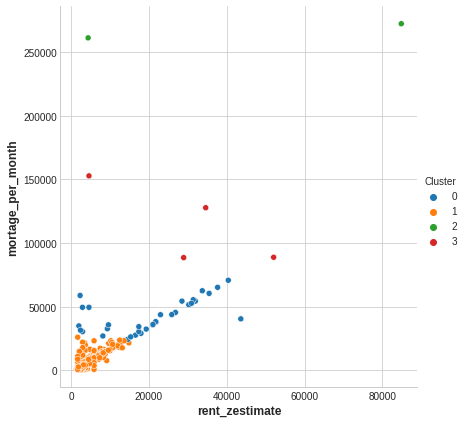

In [53]:
sns.relplot(
    x="rent_zestimate", y="mortage_per_month", hue="Cluster", data=X, height=6,
);

In [54]:
df2=X[X['Cluster']==0]

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
X = df2[[ "rent_zestimate","mortage_per_month"]]
X.head()

,rent_zestimate,mortage_per_month
2,9321.0,32750.0
10,16557.0,27750.0
17,8168.0,27083.0
29,22967.0,43777.0
37,19303.0,32500.0


In [56]:
from sklearn.cluster import KMeans
df1=X
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df1)
    Sum_of_squared_distances.append(km.inertia_)

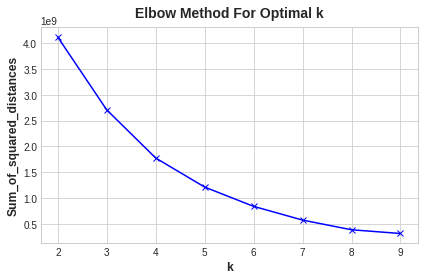

In [57]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [58]:
kmeans = KMeans(n_clusters=3)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,rent_zestimate,mortage_per_month,Cluster
2,9321.0,32750.0,1
10,16557.0,27750.0,1
17,8168.0,27083.0,1
29,22967.0,43777.0,0
37,19303.0,32500.0,1


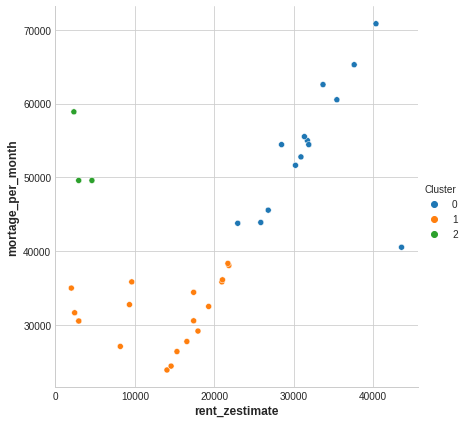

In [59]:
sns.relplot(
    x="rent_zestimate", y="mortage_per_month", hue="Cluster", data=X, height=6,
);

In [60]:
X.Cluster.value_counts()

1    19
0    14
2     3
Name: Cluster, dtype: int64

In [61]:
df3=X[X['Cluster']==1]

In [62]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
X = df3[[ "rent_zestimate","mortage_per_month"]]
X.head()

,rent_zestimate,mortage_per_month
2,9321.0,32750.0
10,16557.0,27750.0
17,8168.0,27083.0
37,19303.0,32500.0
39,17956.0,29166.0


In [63]:
from sklearn.cluster import KMeans
df1=X
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df1)
    Sum_of_squared_distances.append(km.inertia_)

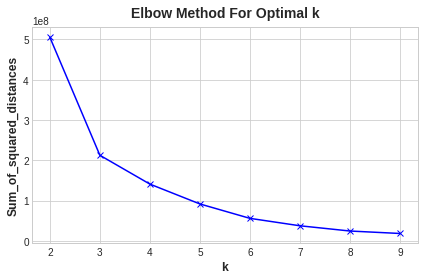

In [64]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [65]:
kmeans = KMeans(n_clusters=4)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,rent_zestimate,mortage_per_month,Cluster
2,9321.0,32750.0,3
10,16557.0,27750.0,0
17,8168.0,27083.0,3
37,19303.0,32500.0,2
39,17956.0,29166.0,0


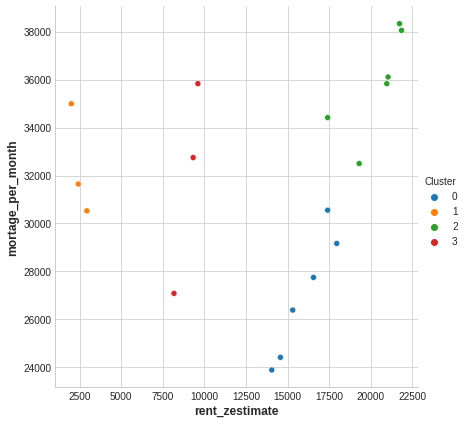

In [66]:
sns.relplot(
    x="rent_zestimate", y="mortage_per_month", hue="Cluster", data=X, height=6,
);

In [67]:
X.Cluster.value_counts()

2    6
0    6
1    4
3    3
Name: Cluster, dtype: int64

As seen above, the golden cluster identified by fractal clustering is 1. 

On an avaerage, it is found that, most of the properties are non profitable if given out for rent. However assumption is, people do it as Investment and not as a source of income.

In [68]:
df['hoa']=df['hoa'].replace(0,df['hoa'].mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
def get_city_label(city):
  if 'Escondido' in city:
    return 0
  elif 'Carlsbad' in city:
    return 1
  elif 'Del Mar' in city:
    return 2
  else:
    return 3

In [70]:
df['city_label']=df['City'].apply(lambda x:get_city_label(x) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
df.columns

Index(['City', 'rank', 'latitude', 'longitude', 'price', 'bathrooms',
       'bedrooms', 'area', 'zestimate', 'rent_zestimate', 'days_on_zillow',
       'is_zillow_owned', 'hoa', 'get_land_area_sqft', 'mortage_per_month',
       'Useful', 'Population', 'Total_Crime', 'city_label'],
      dtype='object')

In [72]:
df=df[['rank', 'bathrooms',
       'bedrooms', 'area', 'zestimate', 'rent_zestimate', 'days_on_zillow',
       'is_zillow_owned', 'hoa', 'get_land_area_sqft', 'mortage_per_month',
       'Population', 'Total_Crime', 'city_label','Useful']]

## **5. Finding Feature Importance with Gini Score:**



In [73]:
df

,rank,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,hoa,get_land_area_sqft,mortage_per_month,Population,Total_Crime,city_label,Useful
0,24,4.000000,4.000000,3164,2.951100e+06,8486.0,9.0,0,112.310044,0,15555.0,63320.0,64703.0,3,0
1,92,2.994695,3.310526,0,1.946873e+06,2694.0,1341.0,0,112.310044,0,1500.0,63320.0,64703.0,3,1
2,36,4.000000,4.000000,1784,5.769300e+06,9321.0,18.0,0,112.310044,0,32750.0,63320.0,64703.0,3,0
3,35,2.000000,2.000000,892,3.829780e+06,3499.0,17.0,0,112.310044,0,21527.0,63320.0,64703.0,3,0
4,10,2.000000,3.000000,1115,1.018600e+06,3940.0,2.0,0,112.310044,0,6666.0,63320.0,64703.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,186,2.994695,3.310526,0,1.946873e+06,1694.0,85.0,0,112.310044,43560,861.0,153215.0,159041.0,0,1
460,7,2.000000,4.000000,1727,7.939000e+05,3200.0,1.0,0,112.310044,0,4383.0,153215.0,159041.0,0,0
461,96,3.000000,4.000000,2542,1.585300e+06,4500.0,15.0,0,112.310044,0,8750.0,153215.0,159041.0,0,0
462,192,2.994695,3.310526,0,1.946873e+06,1895.0,106.0,0,112.310044,435600,2772.0,153215.0,159041.0,0,0


In [74]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression

In [75]:

trainX, testX = train_test_split(df[df.columns.drop('Useful')], test_size=0.30, random_state=1)
trainY, testY = train_test_split(df['Useful'], test_size=0.30, random_state=1)
trainX

,rank,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,hoa,get_land_area_sqft,mortage_per_month,Population,Total_Crime,city_label
98,34,3.0,3.0,1960,1.326600e+06,3895.000000,4.0,0,6.000000,0,7216.0,117220.0,121981.0,1
296,31,3.0,4.0,2251,1.946873e+06,5903.580569,2.0,0,75.000000,0,4861.0,153215.0,159041.0,0
320,64,3.0,4.0,3123,1.131600e+06,4728.000000,8.0,0,112.310044,0,6250.0,153215.0,159041.0,0
342,128,2.0,2.0,992,2.478000e+05,1957.000000,36.0,0,250.000000,0,1361.0,153215.0,159041.0,0
356,165,5.0,6.0,6014,2.400000e+06,7995.000000,58.0,0,112.310044,0,13333.0,153215.0,159041.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,13,3.0,4.0,1724,1.946873e+06,5903.580569,1.0,0,140.000000,0,4163.0,153215.0,159041.0,0
72,12,2.0,4.0,1890,1.946873e+06,2694.000000,3.0,0,112.310044,0,10554.0,63320.0,64703.0,3
400,93,2.0,3.0,1350,7.283000e+05,3095.000000,13.0,0,112.310044,0,3883.0,153215.0,159041.0,0
235,2,2.0,4.0,0,2.867200e+06,5984.000000,8.0,0,112.310044,0,15833.0,4369.0,4517.0,2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Feature: 0, Score: 0.00759
Feature: 1, Score: 0.00006
Feature: 2, Score: 0.00007
Feature: 3, Score: -0.02796
Feature: 4, Score: 0.00000
Feature: 5, Score: 0.10777
Feature: 6, Score: 0.00819
Feature: 7, Score: -0.00000
Feature: 8, Score: -0.02045
Feature: 9, Score: 0.00010
Feature: 10, Score: -0.09310
Feature: 11, Score: -0.00186
Feature: 12, Score: 0.00153
Feature: 13, Score: 0.00005


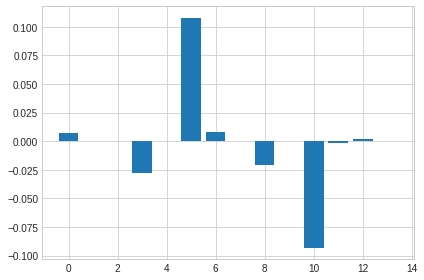

In [76]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = LogisticRegression()
# fit the model
model.fit(trainX, trainY)
# get importance
importance = model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.01000
Feature: 5, Score: 0.11970
Feature: 6, Score: 0.01364
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00637
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.85029
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000


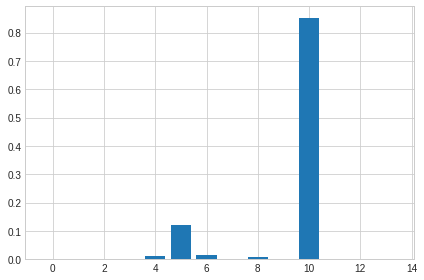

In [77]:
from sklearn.datasets import make_classification

from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier(max_depth=5)
# fit the model
model.fit(trainX, trainY)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.05581
Feature: 1, Score: 0.22357
Feature: 2, Score: 0.04147
Feature: 3, Score: 0.04644
Feature: 4, Score: 0.15999
Feature: 5, Score: 0.12004
Feature: 6, Score: 0.03543
Feature: 7, Score: 0.00527
Feature: 8, Score: 0.01947
Feature: 9, Score: 0.01848
Feature: 10, Score: 0.20846
Feature: 11, Score: 0.02231
Feature: 12, Score: 0.01365
Feature: 13, Score: 0.02962


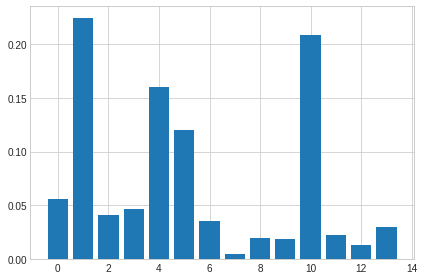

In [78]:
from sklearn.datasets import make_classification

from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
# fit the model
model.fit(trainX, trainY)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

## **6. Training the Model using Muller Loop**

In [79]:
import xgboost
names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", #"Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA","XG","LinearRegression"]

classifiers = [
    KNeighborsClassifier(2),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    # xgboost.XGBRegressor(),
    # LinearRegression()
    ]

Using confusion matrix to compare Models

Classifier = Nearest Neighbors, Score (test, accuracy) = 92.03, Training time = 0.02 seconds
[[104   1]
 [ 10  23]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Linear SVM, Score (test, accuracy) = 99.28, Training time = 4.41 seconds
[[104   1]
 [  0  33]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = RBF SVM, Score (test, accuracy) = 76.09, Training time = 0.01 seconds
[[105   0]
 [ 33   0]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Decision Tree, Score (test, accuracy) = 93.48, Training time = 0.01 seconds
[[101   4]
 [  5  28]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Text(0.5, 1.0, 'Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')

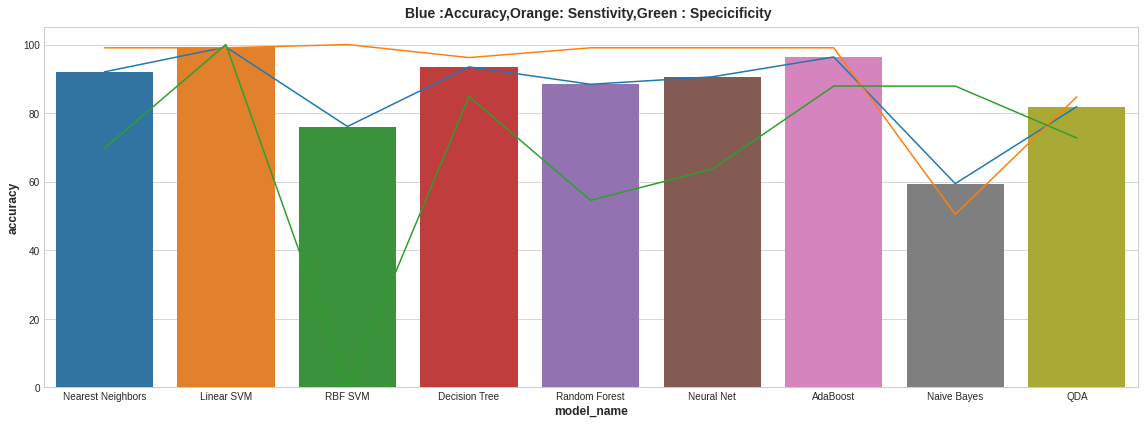

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from time import time
max_score = 0.0
max_class = ''
# iterate over classifiers
score_compare={}
index=0
accuracy={}
specificity={}
sensitivity={}
for name, clf in zip(names, classifiers):
    # print(accuracy)
    start_time = time()
    clf.fit(trainX, trainY)
    score = 100.0 * clf.score(testX, testY)
    y_pred=clf.predict(testX)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))
    
    
    accuracy[names[index]]=accuracy_score(testY,y_pred)*100
    cm=confusion_matrix(testY, y_pred)

    print(cm)
    sensitivity[names[index]] = (cm[0,0]/(cm[0,0]+cm[0,1]))*100
    specificity[names[index]] = (cm[1,1]/(cm[1,0]+cm[1,1]))*100
    index+=1
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

    print(80*'-*')

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
print(accuracy)
accuracy=pd.DataFrame.from_dict(accuracy,orient='index').reset_index()
sensitivity=pd.DataFrame.from_dict(sensitivity,orient='index').reset_index()
specificity=pd.DataFrame.from_dict(specificity,orient='index').reset_index()
# print(accuracy)
accuracy.columns=['model_name','accuracy']
sensitivity.columns=['model_name','sensitivity']
specificity.columns=['model_name','specificity']
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=accuracy, x='model_name', y='accuracy',legend='full')
ax = sns.lineplot(data=sensitivity, x='model_name', y='sensitivity',legend='full')
ax = sns.lineplot(data=specificity, x='model_name', y='specificity',legend='full')
ax = sns.barplot(data=accuracy, x='model_name', y='accuracy')
plt.title('Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')

## **The best classifier model with accuracy of 99.28. is Linear SVM Model. **

## **7. Doing feature transformation using PCA and calculating the confusion matrix again.**


I also used pickle() to dump all the models.

In [81]:
from sklearn.decomposition import PCA
X=df.loc[:,df.columns!='Useful']
pca = PCA(n_components=0.99)
pca.fit(X)
X_pca = pca.transform(X)

In [82]:
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)


original shape:    (458, 14)
transformed shape: (458, 2)


In [83]:
X=pd.DataFrame(X_pca)

In [84]:
trainX, testX = train_test_split(X, test_size=0.30, random_state=1)
trainY, testY = train_test_split(df['Useful'], test_size=0.30, random_state=1)
trainX

,0,1
98,-6.202757e+05,-50815.512281
296,-9.311129e+02,-49456.969685
320,-8.160791e+05,-49743.058645
341,-1.699784e+06,-50062.079085
354,4.521822e+05,-49284.039686
...,...,...
255,-9.351214e+02,-49457.973775
72,1.183659e+03,-52330.875792
396,-1.219337e+06,-49887.753066
235,9.227642e+05,-53863.587398


Classifier = Nearest Neighbors, Score (test, accuracy) = 89.13, Training time = 0.02 seconds
[[103   2]
 [ 13  20]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Linear SVM, Score (test, accuracy) = 81.16, Training time = 94.08 seconds
[[103   2]
 [ 24   9]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = RBF SVM, Score (test, accuracy) = 81.16, Training time = 0.01 seconds
[[105   0]
 [ 26   7]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Decision Tree, Score (test, accuracy) = 88.41, Training time = 0.00 seconds
[[102   3]
 [ 13  20]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Classifier = Neural Net, Score (test, accuracy) = 77.54, Training time = 2.04 seconds
[[104   1]
 [ 30   3]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = AdaBoost, Score (test, accuracy) = 91.30, Training time = 0.14 seconds
[[100   5]
 [  7  26]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = Naive Bayes, Score (test, accuracy) = 33.33, Training time = 0.00 seconds
[[17 88]
 [ 4 29]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Classifier = QDA, Score (test, accuracy) = 34.06, Training time = 0.00 seconds
[[17 88]
 [ 3 30]]
-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-

Text(0.5, 1.0, 'Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')

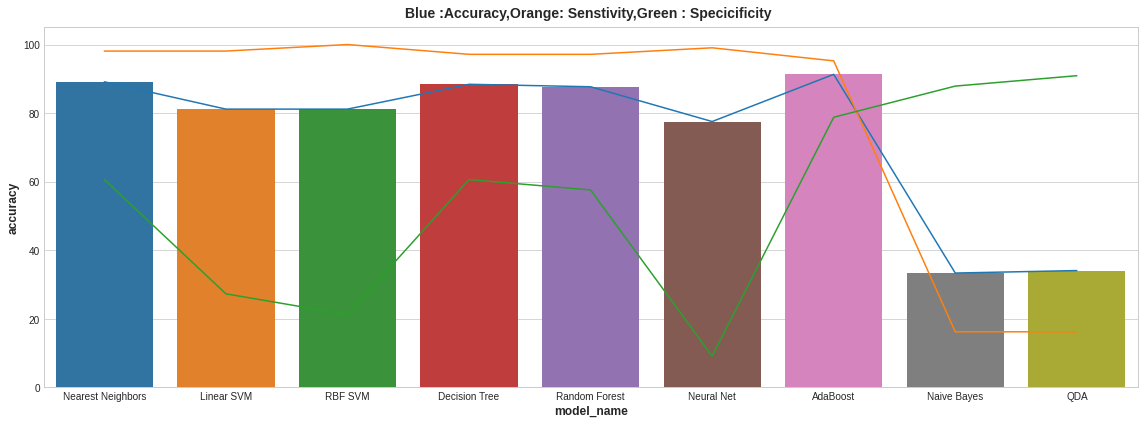

In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, fbeta_score
from time import time
import pickle


max_score = 0.0
max_class = ''
# iterate over classifiers
score_compare={}
index=0
accuracy={}
specificity={}
sensitivity={}
for name, clf in zip(names, classifiers):
    # print(accuracy)
    start_time = time()
    clf.fit(trainX, trainY)
    score = 100.0 * clf.score(testX, testY)

    pickle.dump(clf, open(name+'.pkl','wb'))

    y_pred=clf.predict(testX)
    print('Classifier = %s, Score (test, accuracy) = %.2f,' %(name, score), 'Training time = %.2f seconds' % (time() - start_time))

# plot feature importance
    
    
    
    accuracy[names[index]]=accuracy_score(testY,y_pred)*100
    cm=confusion_matrix(testY, y_pred)

    print(cm)
    sensitivity[names[index]] = (cm[0,0]/(cm[0,0]+cm[0,1]))*100
    specificity[names[index]] = (cm[1,1]/(cm[1,0]+cm[1,1]))*100
    index+=1
    if score > max_score:
        clf_best = clf
        max_score = score
        max_class = name

    print(80*'-*')

print(80*'-' )
print('Best --> Classifier = %s, Score (test, accuracy) = %.2f' %(max_class, max_score))
print(accuracy)
accuracy=pd.DataFrame.from_dict(accuracy,orient='index').reset_index()
sensitivity=pd.DataFrame.from_dict(sensitivity,orient='index').reset_index()
specificity=pd.DataFrame.from_dict(specificity,orient='index').reset_index()
# print(accuracy)
accuracy.columns=['model_name','accuracy']
sensitivity.columns=['model_name','sensitivity']
specificity.columns=['model_name','specificity']
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=accuracy, x='model_name', y='accuracy',legend='full')
ax = sns.lineplot(data=sensitivity, x='model_name', y='sensitivity',legend='full')
ax = sns.lineplot(data=specificity, x='model_name', y='specificity',legend='full')
ax = sns.barplot(data=accuracy, x='model_name', y='accuracy')
plt.title('Blue :Accuracy,Orange: Senstivity,Green : Specicificity ')

In [86]:
df

,rank,bathrooms,bedrooms,area,zestimate,rent_zestimate,days_on_zillow,is_zillow_owned,hoa,get_land_area_sqft,mortage_per_month,Population,Total_Crime,city_label,Useful
0,24,4.000000,4.000000,3164,2.951100e+06,8486.0,9.0,0,112.310044,0,15555.0,63320.0,64703.0,3,0
1,92,2.994695,3.310526,0,1.946873e+06,2694.0,1341.0,0,112.310044,0,1500.0,63320.0,64703.0,3,1
2,36,4.000000,4.000000,1784,5.769300e+06,9321.0,18.0,0,112.310044,0,32750.0,63320.0,64703.0,3,0
3,35,2.000000,2.000000,892,3.829780e+06,3499.0,17.0,0,112.310044,0,21527.0,63320.0,64703.0,3,0
4,10,2.000000,3.000000,1115,1.018600e+06,3940.0,2.0,0,112.310044,0,6666.0,63320.0,64703.0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
459,186,2.994695,3.310526,0,1.946873e+06,1694.0,85.0,0,112.310044,43560,861.0,153215.0,159041.0,0,1
460,7,2.000000,4.000000,1727,7.939000e+05,3200.0,1.0,0,112.310044,0,4383.0,153215.0,159041.0,0,0
461,96,3.000000,4.000000,2542,1.585300e+06,4500.0,15.0,0,112.310044,0,8750.0,153215.0,159041.0,0,0
462,192,2.994695,3.310526,0,1.946873e+06,1895.0,106.0,0,112.310044,435600,2772.0,153215.0,159041.0,0,0


Tha accuracy for all the classifiers has changed a little, but the best accuracy is still offeredb by Linear SVM.

### Using load() to run the best performing model from the memory

In [87]:
model = pickle.load(open('/content/Linear SVM.pkl','rb'))

In [88]:
predictX=testX.sample(n=10)

In [89]:
predictX

,0,1
284,-5.563102e+05,-49648.993306
286,-1.101050e+06,-49844.775275
242,2.543604e+03,-10645.977320
421,-1.817570e+06,-50105.261029
39,3.193083e+06,-51179.609401
422,-1.238734e+06,-49895.109013
258,-1.152444e+06,-49864.216481
446,-1.260633e+06,-49902.577460
139,-2.330144e+05,-50676.986938
307,-9.630494e+02,-49456.945468


In [90]:
model.predict(predictX)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

I used a sample from the dataset as an input Linear SVM Model to predict if a profit is profitable. The predictions are as above, 

1--> Depicting the property is profitable
0--> Depicting the property is non profitable.